# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [ ]:
!pip install pmdarima

In [1]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
# import warnings
# warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


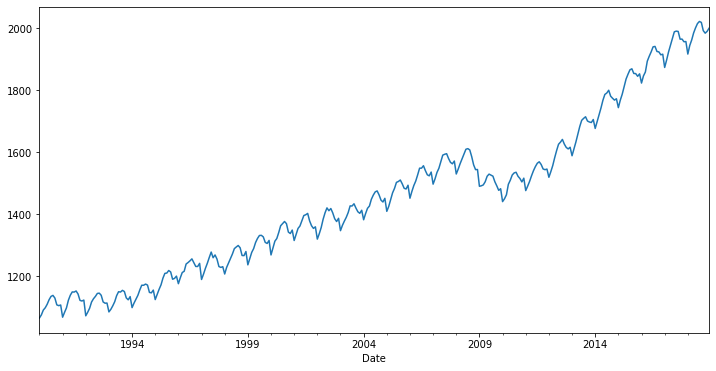

In [6]:
## Постройте график атрибута 'Employees'
ax = df['Employees'].plot(figsize=(12,6))
ax.autoscale(axis='x', tight=True)

[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

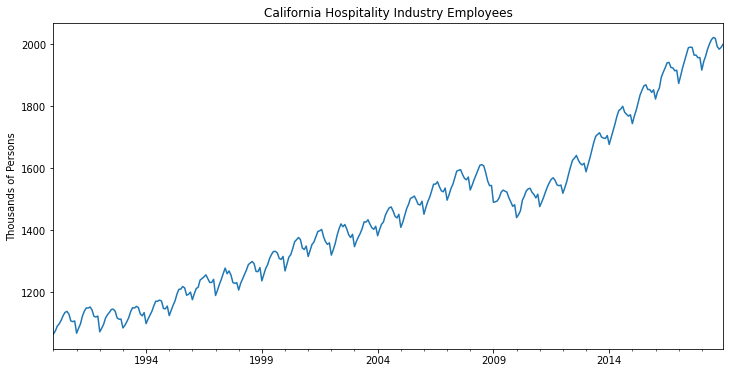

In [21]:
# добавьте заголовок и подписи
ax = df['Employees'].plot(figsize=(12,6), title='California Hospitality Industry Employees')
ax.autoscale(axis='x', tight=True)
ylabel = 'Thousands of Persons'
ax.set(xlabel=xlabel, ylabel=ylabel)

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').
Подсказка: функция seasonal_decompose

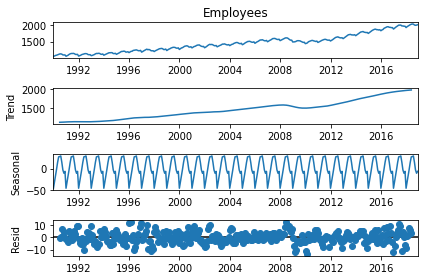

In [29]:
r = seasonal_decompose(df['Employees'], model='additive')
r.plot();

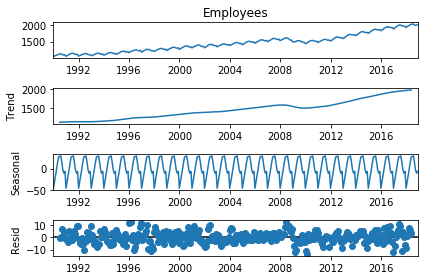

In [11]:
# отобразите результат


### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [30]:
# Подсказка: используйте auto_arima
auto_arima(df['Employees'],seasonal=True,m=12).summary()

C:\Users\79517\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\79517\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\79517\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\79517\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\79517\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 24 Mar 2022   AIC                           2208.504
Time:                                      15:36:39   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.530      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.144      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    704.068      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.328      0.000      -0.834      -0.664
sigma2        29.2980      1.717     17.066      0.000      25.933      32.663
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

SARIMAX(1, 1, 2)x(1, 0, [1], 12)

/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/U

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.307
Date:                              Sun, 07 Mar 2021   AIC                           2210.614
Time:                                      09:24:54   BIC                           2237.559
Sample:                                           0   HQIC                          2221.342
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.005      0.083      0.934      -0.010       0.011
ar.L1          0.9223      0.046     20.140      0.000       0.833       1.012
ma.L1         -0.9440      0.070    -13.421      0.000      -1.082      -0.806
ma.L2          0.1318      0.060      2.196      0.028       0.014       0.249
ar.S.L12       0.9977      0.001    717.060      0.000       0.995       1.000
ma.S.L12      -0.7573      0.042    -17.909      0.000      -0.840      -0.674
sigma2        29.1983      1.702     17.152      0.000      25.862      32.535
===================================================================================
Ljung-Box (Q):                       32.11   Jarque-Bera (JB):                66.37
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.09
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
(ваш результат может отличаться)
### 4. Разделите данные на train/test 
Установите один (последний) год (12 записей) для тестирования. Есть несколько способов сделать это!

In [34]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [37]:
#test.head(20)

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train['Employees']

In [38]:
#предлагается попробовать предложенные параметры из auto_arima SARIMAX(1, 1, 2)x(1, 0, [1], 12)
#Трендовый и сезонный гиперпараметры указываются как кортежи из 3 и 4 элементов соответственно order, а также seasonal_order

model = SARIMAX(train['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit() #обучаем модель на обучающей выборке данных
results.summary() #получаем результаты

C:\Users\79517\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\79517\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\79517\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Thu, 24 Mar 2022   AIC                           2128.116
Time:                                      15:51:48   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.044     21.242      0.000       0.839       1.009
ma.L1         -0.9581      0.070    -13.661      0.000      -1.096      -0.821
ma.L2          0.1495      0.061      2.458      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    729.262      0.000       0.995       1.000
ma.S.L12      -0.7520      0.044    -17.164      0.000      -0.838      -0.666
sigma2        28.7671      1.684     17.080      0.000      25.466      32.068
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.31
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [39]:
start = len(train)  #первая точка в тестовом множестве
end = len(train)+len(test)-1 #последняя точка в тестовом множеств

#предсказываем значения,передав модели results точку начала и окончания
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Predictions SARIMAX(1, 1, 2)x(1, 0, [1], 12)')

#dynamic=False - прогноз при использовании полной истории до точки прогнозирования
#typ='levels' - уровни исходных эндогенных переменных (linear - разностные эндогенные переменные)

### 7. Нарисуйте графики прогнозируемых и известных значений


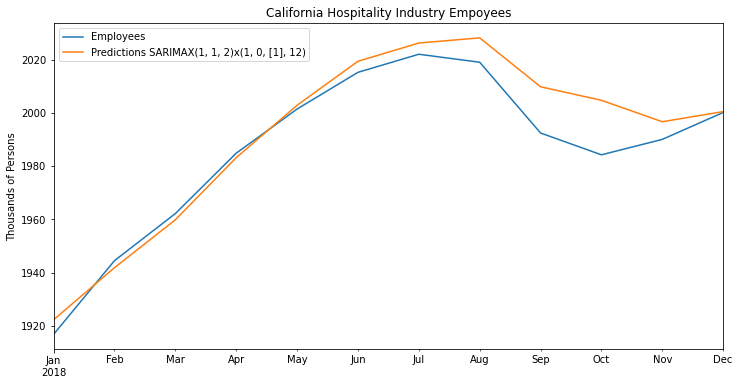

In [41]:
# ваш код
title = "California Hospitality Industry Empoyees"
ylabel = "Thousands of Persons"
xlabel = ""
ax = test['Employees'].plot(legend = True, figsize = (12,6) , title = title)
predictions.plot(legend = True)
ax.set(xlabel = xlabel , ylabel=ylabel)
ax.autoscale(axis="x", tight = True)

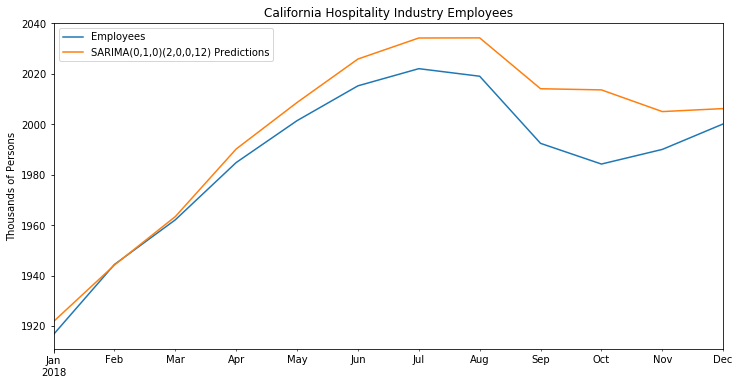

### 8. Оцените качество модели с помощью MSE и RMSE


In [33]:
# Подсказка: используйте функции mean_squared_error и rmse 
#MSE (Среднеквадратическая ошибка Mean Square Error) и RMSE (Среднеквадратическое отклонение Root Mean Square Error)
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {mse_value:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {rmse_value:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 77.64833237
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 8.811829116


In [51]:
# ваш код
mse_value = mean_squared_error(test['Employees'], predictions)
rmse_value = rmse(test['Employees'], predictions)
#квадрат от единиц измерения 11 - кол-во символов (с точкой), 10 - после точки (сколько останется, но макс 10) 
print(f'SARIMA(1, 1, 2)(1, 0, 1, 12) MSE Error: {mse_value:11.10}')
print(f'SARIMA(1, 1, 2)(1, 0, 1, 12) RMSE Error: {rmse_value:11.10}') #единицы те же, что и само измерение

SARIMA(1, 1, 2)(1, 0, 1, 12) MSE Error: 77.68363379
SARIMA(1, 1, 2)(1, 0, 1, 12) RMSE Error: 8.813831958


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [52]:
model = SARIMAX(df['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

C:\Users\79517\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\79517\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\79517\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 24 Mar 2022   AIC                           2208.504
Time:                                      16:25:42   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.530      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.144      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    704.068      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.328      0.000      -0.834      -0.664
sigma2        29.2980      1.717     17.066      0.000      25.933      32.663
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
# для прогнозирования используйте с нужными параметрами results.predict() -- см. выше
# прогноз на год вперед (12 точек), "len(df)-1" - соежиняем графики, чтобы не былоразрыва
fcast = results.predict(len(df)-1,len(df)+11,typ='levels').rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12) Forecast')

### 10. Постройте график предсказаний и график исходных данных


<AxesSubplot:>

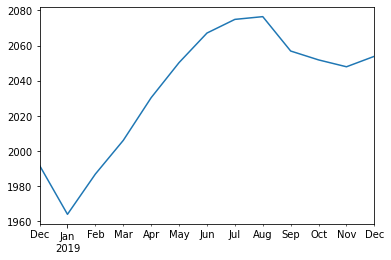

In [69]:
fcast.plot()

[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

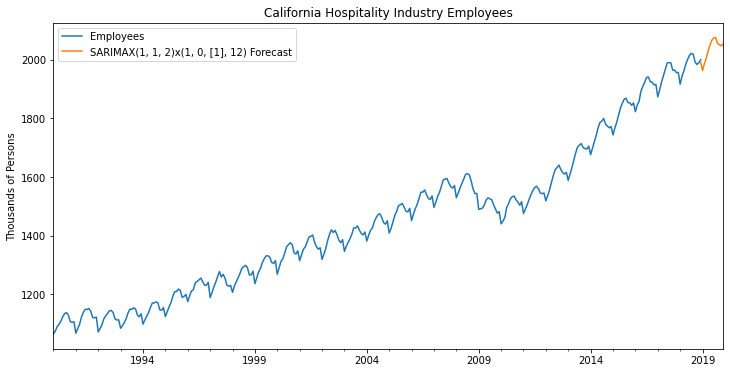

In [70]:
# отобразите общий график
title = 'California Hospitality Industry Employees'
ylabel = 'Thousands of Persons'
xlabel = ''

ax = df['Employees'].plot(legend=True, figsize=(12,6),title=title) 
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

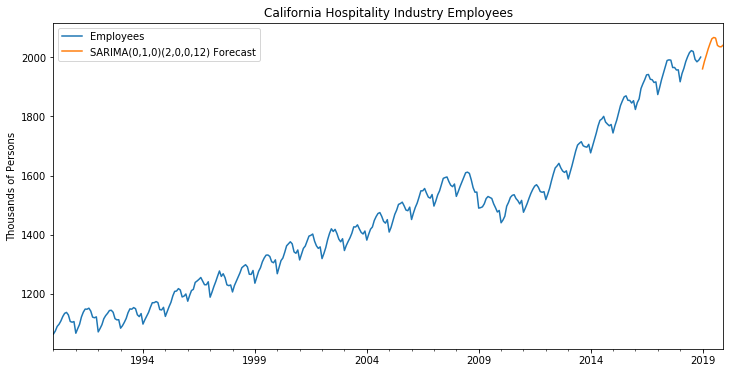